In [10]:
import cv2
from cv2 import dnn_superres
from stack_images import stackImages
import matplotlib.pyplot as plt
sr = dnn_superres.DnnSuperResImpl_create()



In [11]:
image = cv2.imread('Ressources/picture_png_1.PNG')
image2 = cv2.imread('Ressources/picture_png_2.PNG')



In [14]:
def model_comp(image1,image2,jupyter):
    model_names = ['espcn','fsrcnn','edsr']
    model_dir = ['ESPCN_x4_small_model.pb','FSRCNN-small_x4.pb','EDSR_x4.pb']
    
    
    for i in range(len(model_names)):
        path = './Ressources/'+model_dir[i]
        sr.readModel(path)
        sr.setModel(model_names[i], 4)

        result = sr.upsample(image)
        result2 = sr.upsample(image2)

        cv2.imwrite("./img_upscaled_%s.png"%model_names[i], result)
        cv2.imwrite("./img_upscaled_%s.png"%model_names[i], result)
    
        imgStack = stackImages(2.0,([image,result],[image2,result2]))
        if jupyter == True:
            plt.figure(figsize = (10,10))
            plt.title('Original vs Upscaled, model: %s'%model_names[i])
            
            plt.imshow(imgStack)
        else:
            cv2.imshow("stacked images %s"%model_names[i], imgStack)

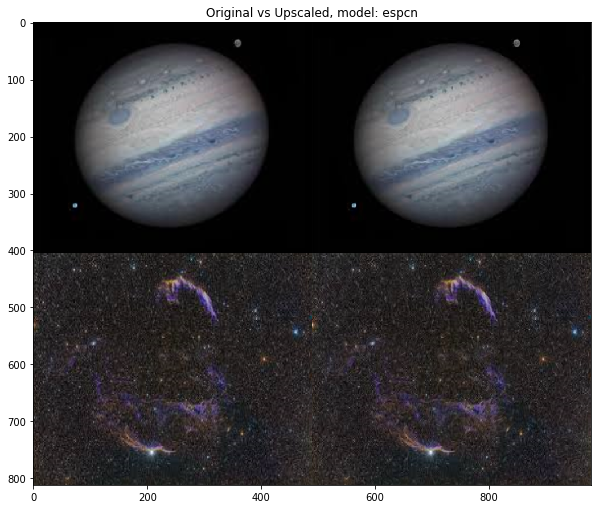

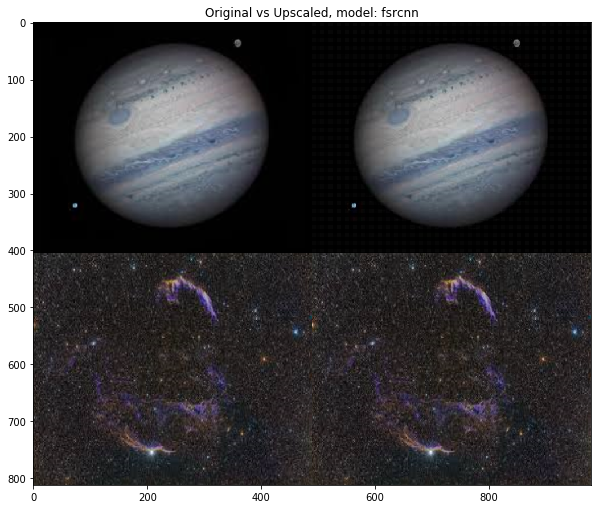

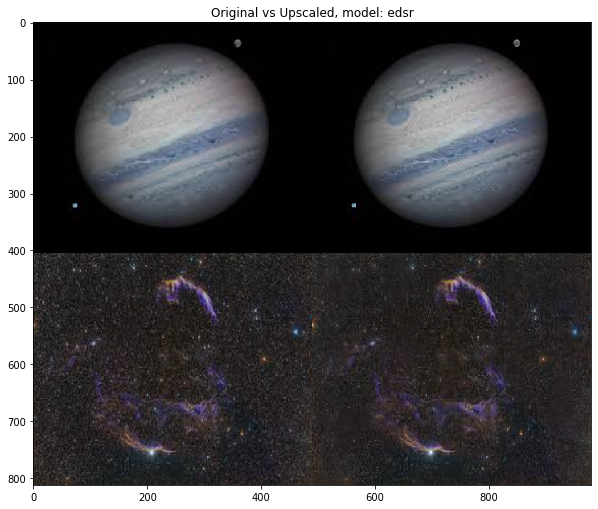

In [15]:
model_comp(image,image2,jupyter=True)

In [20]:
def upscale_model(image_folder, num_imgs,model,model_dir):
    path = './'+image_folder+'/'+model_dir
    sr.readModel(path)
    sr.setModel(model,4)
    for i in range(num_imgs):
        image_read = cv2.imread("./"+image_folder +"/picture_png_%s.PNG"%str(i+1))
        print("/picture_png_%s.PNG"%str(i+1))
        result = sr.upsample(image_read)

        cv2.imwrite("./%s_upscale%i.png"%(model,i+1),result)
        #imgStack = stackImages(1,([image,result]))
        

In [21]:
upscale_model("Ressources",5,'espcn','ESPCN_x4_small_model.pb')

/picture_png_1.PNG
/picture_png_2.PNG
/picture_png_3.PNG
/picture_png_4.PNG
/picture_png_5.PNG
